## Objetivo

Nesse projeto busco consolidar os conhecimentos adquiridos nos 3 módulos da disciplinha de Machine Learning.

Como resultado teremos um modelo capaz de identificar o risco de crédito para a instituição financeira ao realizar um empréstimo para seus clientes.

## Requisitos

Fazer todo processo de modelagem iniciando seguindo o fluxo de EDA, tratamento dos dados, comparação entre modelos e escolha do melhor modelo, seleção de features, redução de dimensionalidade, interpretação dos modelos e otimização de hiperparâmetros.

## Dados

Para realização dessa tarefa utilizamos um dataset com as informações de empréstimos realizados previamente pela instituição.

- [Link para o dataset (Kaggle)](https://www.kaggle.com/competitions/home-credit-default-risk/data)

### Observação importante:

Nesse documento busco apresentar apenas os insights obtidos no decorrer do projeto.

Todos os códigos e análises realizadas encontram-se identificados nos links dispostos no decorrer desse documento para facilitar sua leitura.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('./datasets/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- [Link para o dicionário de dados](./images/dicionario_de_dados.html)

## EDA

Verificando a distribuição da variável TARGET, identificamos um grande desbalanceamento entre as classes.

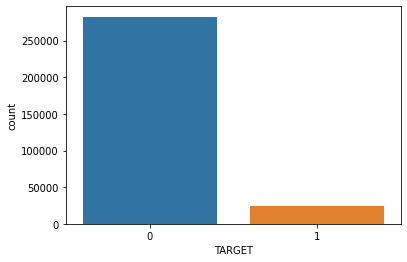

In [103]:
sns.countplot(x=df['TARGET']);

Separamos o dataset para facilitar o tratamento das variáveis (categóricas e numéricas) e encontramos uma grande quantidade de valores nulos.

<img src='https://github.com/thiagopastre/DS/blob/0fbd4959da32606b8611fcfda7c757c81c549922/images/nulls.png' align=left>

### Features numéricas

Optamos por descartar as features numéricas que tivessem uma quantidade de valores nulos acima de 50% pois não trariam informações relevantes para o modelo e tivemos uma redução de 36% nas variáveis numéricas do dataset.

Em seguida normalizamos os dados com o StandardScaler e utilizamos o VarianceThreshold para selecionar as features que possuíam maior variância.
Com esses ajustes tivemos uma redução de mais 31% nas features numéricas do dataset.

Porém nenhuma das features restante possui uma boa correlação com o TARGET.

<img src=.\images\target_corr.png align=left>

Com auxílio do mapa de calor pudemos identificar e remover as multicolinearidades restantes.

<img src=.\images\heatmap.png align=left>

Nesse momento ainda restaram algumas features com valores nulos e decidimos inserir a mediana utilizando o SimpleImputer.

Chegamos ao tratamento de outliers e observamos o seguinte problema:

#### Observamos que executando o código abaixo para remoção de outliers, todos os registros da classe 1 eram excluídos
```python
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

result = numeric_features[~((numeric_features < (Q1 - 1.5 * IQR)) |(numeric_features > (Q3 + 1.5 * IQR))).any(axis=1)]
```

Então resolvemos separar por TARGET para avaliar os outliers individualmente e assim conseguimos tratá-los.

**OBS: Sem conhecimento prévio do negócio pudemos apenas identificar os outliers, porém não temos como saber se realmente são outliers ou valores que podem ser válidos para o negócio.**

### Features categóricas

Inicialmente transformamos as features categóricas com uso do TargetEncoder.

Optamos por esse método pois a utilização do OneHotEncoder (nesse cenário) iria gerar uma quantidade muito elevada de novas variáveis, o que iria em sentido contrário à redução de dimensionalidade que buscamos desde o início.

Para uma seleção automatizada das features mais importantes utilizamos o SelectKBest, onde testamos diversas possibilidades para o número "ideal" de features.

O fluxograma abaixo ilustra o tratamento aplicados às features categóricas:

<img src=.\images\fluxograma.jpg align=left>

Nosso dataset, que originalmente continha 121 features, passou a ficar com apenas 38 features mais relevantes.

Essa redução se mostrou importante, pois ficará claro nas etapas seguintes que as features removidas prejudicavam o desempenho dos modelos testados. 

- [Link para o notebook contendo os códigos da EDA](./codigos/1.Selecao_features.ipynb)

## Modelagem

Para criação do modelo baseline, simplesmente descartamos as features categóricas e inserimos o valor da mediana onde haviam dados nulos.

Utilizamos a **Regressão Logística** e obtivemos o seguinte resultado:

<img src=.\images\baseline.png align=left>

O modelo baseline é bastante assertivo na previsão da classe 0, porém nosso interesse está na classe 1. Sendo assim o resultado desse modelo é nulo.

- [Link para o notebook contendo os códigos do modelo Baseline](./codigos/2.Modelagem_baseline.ipynb)

Em nossa segunda tentativa, utilizamos o **RandomForest com o auxílio da validação cruzada** para otimizar os hiperparâmetros do modelo.

Aqui utilizamos o dataset tratado, porém contendo **apenas features numéricas** para efeito de comparação posteriormente.

<img src=.\images\random_forest_1.png align=left>

Observamos uma melhora considerável no f1-score da classe 1, porém notamos o recall ainda muito baixo.

Testamos também com **Gradient Boosting e validação cruzada**, porém o resultado não sofreu nenhuma alteração.

Diante desses resultados (já esperados levando-se em consideração o grande desbalanceamento dos dados) decidimos lançar mão do **SMOTE** para balancear as classes artificialmente, resultando em:

<img src=.\images\random_forest_smote_1.png align=left>

Obtivemos uma melhora interessante no recall da classe 1 com uso do RandomForest + Smote.

Realizamos novas tentativas **alterando os scorings de avaliação dos modelos** e também **mantendo os outliers**, porém não tivemos sucesso.

- [Link para o notebook contendo os códigos do modelo RandomForestClassifier + GB + Smote](./codigos/3.Modelagem_df_num_features.ipynb)

Inserimos também as **features categóricas** e aplicamos novamente o **RandomForest com o auxílio da validação cruzada**, porém nessa tentativa não utilizamos o SMOTE para balancear as classes.

<img src=.\images\random_forest_2.png align=left>

Observamos que o resultado foi idêntico à tentaviva que fizemos anteriormente sem utilizar as features categóricas, indicando que as mesmas não possuem influência na capacidade preditiva do modelo.

Por fim aplicamos o SMOTE no dataset tratado (contendo features numéricas e categóricas) resultando em:

<img src=.\images\random_forest_smote_2.png align=left>

Praticamente sem alterações se comparado com o resultado do RandomForest + SMOTE sem a utilização das features categóricas.

- [Link para o notebook contendo os códigos do modelo final](./codigos/4.Modelagem_df_final.ipynb)

## Conclusões

- Comparando os resultados de diversos modelos, pudemos notar a importância da seleção de features (garbage in, gargabe out)
- Por não conhecer os detalhes do negócio, realizamos alguns tratamentos de forma genérica (ex: exclusão de dados nulos e outliers)
- A inclusão de dados presentes em outros datasets poderia gerar novas features importantes para a classificação, porém o processo de EDA consumiu um tempo elevado e não conseguimos realizar esses testes
- Possivelmente modelos como SVM se sairiam melhor na classificação devido à possível não separabilidade linear dos dados